In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
data_nor = pd.read_csv('../Downloads/NOR.csv')
data_nor.head()

# Setting up the data
data_nor = pd.DataFrame(data_nor)
print(data_nor)

         characteristic  direction excntry         eom     signal  n_stocks  \
0                   age         -1     NOR  1989-04-30 -60.000000        59   
1                   age         -1     NOR  1989-05-31 -60.000000        62   
2                   age         -1     NOR  1989-06-30 -60.000000        82   
3                   age         -1     NOR  1989-07-31 -60.000000        82   
4                   age         -1     NOR  1989-08-31 -60.000000        83   
...                 ...        ...     ...         ...        ...       ...   
50631  zero_trades_252d          1     NOR  2020-08-31   0.004000       172   
50632  zero_trades_252d          1     NOR  2020-09-30   0.004065       177   
50633  zero_trades_252d          1     NOR  2020-10-31   0.004246       168   
50634  zero_trades_252d          1     NOR  2020-11-30   0.004326       167   
50635  zero_trades_252d          1     NOR  2020-12-31   0.004399       164   

       n_stocks_min    ret_ew    ret_vw            

In [316]:
# Data preprocessing

# The input variables, x
nor_array = data_nor.to_numpy() # important in order to be able to process data
nor_returns = nor_array[:,7:9]  
nor_array.shape

(50636, 10)

In [317]:
# 2.1 Fama-French Three Factors Model Data

# Norway, DNB_BANK, returns
nor_DNB_BANK_monthly = pd.read_csv('../Downloads/DNB_BANK_PX_Last.csv',delimiter=';') # read data
nor_DNB_BANK_monthly_array = nor_DNB_BANK_monthly.to_numpy() # important in order to be able to process data
nor_DNB_BANK_monthly_returns = nor_DNB_BANK_monthly_array[:,2] 
DNB_BANK_returns = nor_DNB_BANK_monthly_returns[14:338] # start 1994-01-31, end 2020-12-31

print(DNB_BANK_returns)
DNB_BANK_returns.shape

[0.276 -0.08370886 -0.16245256 0.15151902 -0.12631637 -0.0421874 0.0220559
 0.03998445 -0.06511715 0.0759848 0.0 0.08232671 -0.00543727 -0.07101341
 -0.02942452 0.0 -0.00606331 0.01830091 0.02995334 -0.02908223 0.035944
 -0.01156562 -0.02925237 0.0 0.07232126 0.1684908 -0.04323832 -0.05027253
 0.03705355 0.00510423 0.02539156 0.01975811 0.0048566 0.02416565
 0.13208484 0.02084247 0.14489147 0.12357025 -0.04665286 -0.10140658
 0.08560072 0.02868682 0.11848237 -0.04986549 -0.02620675 0.06733326
 -0.0347153 0.13724748 -0.00717506 0.25601091 -0.00477309 -0.05542022
 0.03315066 -0.00741068 0.02986404 -0.32368428 -0.17143072 0.11638675
 0.11970399 -0.09310771 0.27564267 -0.13664312 0.01799379 -0.00353515
 -0.02838151 -0.05108002 0.03847867 0.15924958 -0.022374 -0.00653887
 0.07236637 0.00920662 -0.03191959 0.00997131 0.06578446 -0.03084574
 0.01274441 0.11948207 0.02529212 0.12876515 -0.04128007 0.02026234
 0.05955367 0.11241276 -0.04736504 0.05581407 -0.08809817 -0.03383105
 -0.01000448 0.0

(324,)

In [318]:
# 2.2 Fama-French Three Factors Model Data

# Norway, Size, SMB
nor_size_monthly_vw = pd.read_csv('../Downloads/[nor]_[size]_[monthly]_[vw_cap].csv') # read data
nor_size_monthly_vw_array = nor_size_monthly_vw.to_numpy() # important in order to be able to process data

nor_size_monthly_vw_returns = nor_size_monthly_vw_array[:,6] 
SMB_returns_nor = nor_size_monthly_vw_returns [96:420]

print(SMB_returns_nor)
SMB_returns_nor.shape

[0.00623596114098075 -0.0357954704867458 0.0275081208764988
 0.0022897668303532 -0.0129975414547249 0.0183070310857043
 -0.0752910695134867 0.00587464762231631 0.00757306330897835
 -0.0125549416879627 0.0010104259914390599 -0.00622299054284005
 0.00611346861455275 0.0493582298627968 0.0361751118277053
 -0.0395507435679484 0.0356520076001909 -0.00179391369978062
 -0.00511212657193534 0.0415470350844731 0.0261233929202884
 -0.0228264194796492 0.0399104720317053 0.00584668457610243
 0.0377611609840349 0.0413411781608821 -0.0354223840298354
 -0.0354078808826851 0.0198226733940935 0.00533345659926375
 0.0384063152141205 -0.02047561479811 -0.0103416994789406
 -0.0214220523771793 0.0234606496307224 -0.00704744872309121
 0.0508092127391294 -0.00913012233237473 0.00408756728301586
 -0.0347969139253449 -0.012053505488584 -0.012189765829757001
 0.03408027859036 0.0254740486600434 -0.0280381432934746
 0.0154631196006839 -0.0112915462503585 -0.00865719127683417
 0.0204463096094948 -0.03619120758662

(324,)

In [319]:
# 2.3 Fama-French Three Factors Model Data

# Norway, Value, HML
nor_value_monthly_vw = pd.read_csv('../Downloads/[nor]_[value]_[monthly]_[vw_cap].csv') # read data
nor_value_monthly_vw_array = nor_value_monthly_vw.to_numpy() # important in order to be able to process data

nor_value_monthly_vw_returns = nor_value_monthly_vw_array[:,6] 
HML_returns_nor = nor_value_monthly_vw_returns[84:420]

print(HML_returns_nor)
HML_returns_nor.shape

[0.0253962369195077 0.0064725015766094705 -0.0101903162328141
 -0.0294372748920524 0.01428088530424 -0.01971877112282
 -0.0118503891248518 0.0244998331947123 -0.0427152251578905
 -0.0156222613577744 0.0211780164966024 0.0391876789582405
 -0.00475125123425865 -0.000463836562574775 0.0164349619909346
 -0.0206323966596823 -0.00128921455528064 -0.0045451117835146205
 -0.0196759560577582 -0.00592089869440287 0.0220310373257279
 0.00997259468250475 -0.0354612952366945 -0.0232110703057204
 0.0139954570521797 0.0247368868530079 0.0018855136966779
 -0.0253585136942297 0.0166131594921269 0.0056731620220839
 0.0076968210775319795 -0.00631732512438834 0.00138120138270766
 -0.0235020016105685 0.00276534636433652 0.00648442821843057
 -0.0361244964423062 0.0137417255925486 -0.00213334323179516
 0.0415678809134926 -0.0299456861607221 -0.0148509215827887
 0.0107280389926807 -0.0520488184699083 -0.0360893764864152
 -0.0375542763980231 0.00172088869288512 0.0174585290459593
 -0.0130516251223193 0.0123846

(324,)

In [320]:
# 2.4 Fama-French Three Factors Model Data

# Norway, Historical risk-free rate
risk_free_nor = pd.read_csv('../Downloads/DP_LIVE_15022022162828339.csv') # read data
risk_free_nor_array = risk_free_nor.to_numpy() # important in order to be able to process data

risk_free_nor_returns = risk_free_nor_array[:,6]/100 
rf_nor = risk_free_nor_returns[3:327]

print(rf_nor)
rf_nor.shape

[0.0536 0.0509 0.0525 0.0546 0.051500000000000004 0.054299999999999994
 0.0553 0.058600000000000006 0.0668 0.0689 0.0727 0.062400000000000004
 0.0576 0.0546 0.053899999999999997 0.0536 0.0567 0.0579 0.0562
 0.053399999999999996 0.0536 0.053399999999999996 0.052199999999999996
 0.054299999999999994 0.0548 0.0526 0.0492 0.047 0.047599999999999996
 0.0493 0.0499 0.050199999999999995 0.0509 0.0504 0.043899999999999995
 0.0414 0.0352 0.0352 0.0351 0.035 0.0346 0.0351 0.04 0.0404 0.0394 0.0397
 0.0395 0.0387 0.0382 0.0384 0.0408 0.0415 0.0447 0.0482 0.0535 0.0674
 0.0803 0.07919999999999999 0.0796 0.0824 0.07719999999999999 0.0727
 0.0688 0.0655 0.0666 0.06480000000000001 0.0635 0.060899999999999996
 0.059699999999999996 0.0637 0.061500000000000006 0.059699999999999996
 0.0588 0.058899999999999994 0.06 0.0623 0.065 0.0672 0.0691 0.0712 0.0733
 0.07519999999999999 0.07429999999999999 0.0742 0.0741 0.0732 0.0739
 0.0748 0.0745 0.0742 0.0737 0.0731 0.07139999999999999 0.0694 0.069
 0.0659 0.063

(324,)

In [321]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [322]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

In [323]:
excess_returns_nor = DNB_BANK_returns - rf_nor
print(excess_returns_nor)

[0.22240000000000001 -0.13460886 -0.21495256 0.09691902 -0.17781637
 -0.0964874 -0.0332441 -0.01861555000000001 -0.13191714999999998
 0.007084800000000002 -0.0727 0.019926709999999993 -0.06303726999999999
 -0.12561341 -0.08332452 -0.0536 -0.06276331 -0.03959909 -0.02624666
 -0.08248222999999999 -0.017656000000000005 -0.06496562 -0.08145237
 -0.054299999999999994 0.017521259999999997 0.11589079999999999
 -0.09243831999999999 -0.09727253 -0.010546449999999999
 -0.044195769999999995 -0.02450844 -0.030441889999999996 -0.0460434
 -0.02623435 0.08818484000000001 -0.02055753 0.10969146999999999
 0.08837025000000001 -0.08175286 -0.13640658 0.051000720000000006
 -0.006413180000000001 0.07848237 -0.09026549 -0.06560674999999999
 0.027633260000000007 -0.0742153 0.09854748 -0.045375059999999995
 0.21761091 -0.045573090000000004 -0.09692022 -0.011549339999999998
 -0.05561068 -0.023635959999999998 -0.39108428 -0.25173072
 0.037186750000000005 0.04010398999999999 -0.17550770999999998 0.19844267
 -0.2

In [324]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for Norway
# Note: we need to start from 1990-05-31 for Norway since the data starts from there
mkt_ret_nor = mkt_ret_array[20334:20658] # 324 datapoints
print(mkt_ret_nor)

[['NOR' '1994-01-31' 68 ... 0.15785672369999998 0.1418851286 0.1553537237]
 ['NOR' '1994-02-28' 65 ... 0.0010294204 0.0122056348 -0.00109058]
 ['NOR' '1994-03-31' 65 ... -0.031841153999999997 -0.069909347
  -0.034310154]
 ...
 ['NOR' '2020-10-31' 255 ... -0.047197710999999996 -0.06433862
  -0.046003857999999995]
 ['NOR' '2020-11-30' 268 ... 0.2901295107 0.2304916979 0.2874249084]
 ['NOR' '2020-12-31' 272 ... 0.1786583098 0.101887318 0.1785983098]]


In [325]:
mkt_ret_nor_df = pd.DataFrame(mkt_ret_nor)

y_nor = mkt_ret_nor[:,7] # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_nor) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_nor = np.asarray(y_nor).astype(np.float32)

print(R_m_nor)
print(len(R_m_nor))

[ 1.44388124e-01  1.43256346e-02 -6.74403459e-02  3.58888544e-02
  2.51805875e-03 -3.52747217e-02  9.45426896e-02  2.67693656e-03
 -5.07588908e-02  6.71645254e-02 -2.65081692e-02  5.38478084e-02
  1.08608184e-02 -9.21744388e-03  7.37342238e-03  7.79761299e-02
  1.02714440e-02  4.67301123e-02  2.85150763e-02 -4.11686562e-02
  3.97419520e-02 -4.72068153e-02  3.61630111e-03  2.62783561e-02
 -1.08116539e-02  4.91567813e-02 -4.28339606e-03  4.35121059e-02
  1.94590185e-02  6.76023448e-03 -2.40564700e-02  2.77062804e-02
  6.48009498e-03  4.18781303e-02  7.45703951e-02  4.01070751e-02
  8.96164700e-02 -3.83343473e-02  1.38211315e-02 -5.04712239e-02
  6.59312233e-02  1.21567538e-02  1.81676261e-02  1.84158627e-02
  9.31669399e-02 -2.65115988e-04 -6.76626340e-02 -1.25400797e-02
 -6.81189969e-02  2.35257819e-02  7.49478489e-02  6.00685701e-02
 -6.76110536e-02 -5.29658273e-02  1.10007096e-02 -2.65511990e-01
 -4.11356986e-02  1.28905341e-01 -6.98331222e-02 -5.02823591e-02
  1.08147293e-01 -8.90615

In [326]:
# df = pd.DataFrame(market_returns_nor,HML_returns_nor,SMB_returns_nor)
# print(df)
X1 = R_m_nor
X2 = HML_returns_nor
X3 = SMB_returns_nor
print(X3)

# regressors - that which regresses, or causes regression
X = R_m_nor
X_df = pd.DataFrame(X) # This represents output or column: # R_m_nor
X_df.columns = ['X1 (R_m_nor)']
X_df.insert(1, 'X2 (HML_returns_nor)', HML_returns_nor, True)
print(X_df)
X_df.insert(1, 'X3 (SMB_returns_nor)', SMB_returns_nor, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_nor

Y = np.asarray(Y).astype(np.float32)
X_df = np.asarray(X_df).astype(np.float32)

print(Y)

[0.00623596114098075 -0.0357954704867458 0.0275081208764988
 0.0022897668303532 -0.0129975414547249 0.0183070310857043
 -0.0752910695134867 0.00587464762231631 0.00757306330897835
 -0.0125549416879627 0.0010104259914390599 -0.00622299054284005
 0.00611346861455275 0.0493582298627968 0.0361751118277053
 -0.0395507435679484 0.0356520076001909 -0.00179391369978062
 -0.00511212657193534 0.0415470350844731 0.0261233929202884
 -0.0228264194796492 0.0399104720317053 0.00584668457610243
 0.0377611609840349 0.0413411781608821 -0.0354223840298354
 -0.0354078808826851 0.0198226733940935 0.00533345659926375
 0.0384063152141205 -0.02047561479811 -0.0103416994789406
 -0.0214220523771793 0.0234606496307224 -0.00704744872309121
 0.0508092127391294 -0.00913012233237473 0.00408756728301586
 -0.0347969139253449 -0.012053505488584 -0.012189765829757001
 0.03408027859036 0.0254740486600434 -0.0280381432934746
 0.0154631196006839 -0.0112915462503585 -0.00865719127683417
 0.0204463096094948 -0.03619120758662

In [327]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

In [328]:
# X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(324, 3)

In [329]:
mlr = LinearRegression()  
mlr.fit(X_df, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  -0.031201215
Coefficients: [0.8592958  0.21129987 0.39997518]


In [331]:
# rf_nor
# DNB_BANK_returns
# HML_returns_nor
# SMB_returns_nor

In [332]:
# compute with formulas from the theory
yhat = mlr.predict(X_df)
SS_Residual = sum((Y-yhat)**2)   
SS_Total = sum((Y-np.mean(Y))**2)     

# r_squared
r_squared = 1 - (float(SS_Residual))/SS_Total
print(r_squared)

# adjusted_r_squared
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X_df.shape[1]-1)
print(adjusted_r_squared)

0.43190859498098155
0.4265827380589282


### THE CODE BELOW IS THE CODE I AM TRYING TO DEVELOP

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
# Data preprocessing

# The input variables, x
### nor_array = data_nor.to_numpy() # important in order to be able to process data
### nor_returns = nor_array[:,7:9]  
# X = norway_returns

# Note: we need to start from 1990-05-31 for Norway since the data starts from there

# Some  (2 here to test) of the input variables (x) for Norway
#age_nor = norway_array[13:381,8]  # age factor portfolio 381 datapoints, ret_vw
#print(age_norway)

#be_me_nor = norway_array[3229:3597,8] # 368 datapoints, ret_vw
# print(be_me_norway)

# I print this out to see it as panel data for input variable

### X_age = age_norway

#### X_df = pd.DataFrame(X_age) # This represents output or column: # ret_vw
#### X_df.columns = ['age (ret_vw)']
#### X_df.insert(1, 'be_me_norway (ret_vw)', be_me_norway, True)
# X = X_df.to_numpy()
# X = np.asarray(X).astype(np.float32)

print(X_df)
print(X)

# Print out the input variables
#print(X)
print(len(X))
X.shape
X_df.shape


[[ 1.44388124e-01  6.23596134e-03  2.53962371e-02]
 [ 1.43256346e-02 -3.57954688e-02  6.47250144e-03]
 [-6.74403459e-02  2.75081210e-02 -1.01903165e-02]
 [ 3.58888544e-02  2.28976691e-03 -2.94372756e-02]
 [ 2.51805875e-03 -1.29975416e-02  1.42808855e-02]
 [-3.52747217e-02  1.83070302e-02 -1.97187718e-02]
 [ 9.45426896e-02 -7.52910674e-02 -1.18503887e-02]
 [ 2.67693656e-03  5.87464776e-03  2.44998336e-02]
 [-5.07588908e-02  7.57306349e-03 -4.27152254e-02]
 [ 6.71645254e-02 -1.25549417e-02 -1.56222610e-02]
 [-2.65081692e-02  1.01042597e-03  2.11780164e-02]
 [ 5.38478084e-02 -6.22299034e-03  3.91876772e-02]
 [ 1.08608184e-02  6.11346867e-03 -4.75125108e-03]
 [-9.21744388e-03  4.93582301e-02 -4.63836564e-04]
 [ 7.37342238e-03  3.61751132e-02  1.64349619e-02]
 [ 7.79761299e-02 -3.95507440e-02 -2.06323974e-02]
 [ 1.02714440e-02  3.56520079e-02 -1.28921459e-03]
 [ 4.67301123e-02 -1.79391366e-03 -4.54511167e-03]
 [ 2.85150763e-02 -5.11212647e-03 -1.96759552e-02]
 [-4.11686562e-02  4.15470339e-

(324, 3)

### Now we are going to do the train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.3) # , random_state=42

In [336]:
X_train.shape # this is just to show that we have 70% of the data in 257 rows for the training set

(226, 3)

In [337]:
X_test.shape # this is just to show that we have 30% of the data in 111 rows for the test set

(98, 3)

### The next step is to normalize or scale the data.
Because we are working with weights and biases inside of a neural network, 
if we have really large values in our feature set, that could cause errors with the weights.

In [338]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)

In [339]:
scaler = MinMaxScaler()

In [340]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(X_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler(copy=True, feature_range=(0, 1))

In [341]:
X_train = scaler.transform(X_train) # we just scale the test training data set to be between 0 and 1

In [342]:
X_test = scaler.transform(X_test) # we just scale the test data set to be between 0 and 1

In [343]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

X_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[0.59129524, 0.756117  , 0.40080807],
       [0.80462754, 0.6989708 , 0.54173934],
       [1.        , 0.9322674 , 0.6313131 ],
       [0.6059183 , 0.74868137, 0.44244543],
       [0.64549375, 0.6241557 , 0.36356887],
       [0.63222003, 0.47253847, 0.48381793],
       [0.40876192, 0.703749  , 0.99999994],
       [0.46980235, 0.76239026, 0.4465197 ],
       [0.5717824 , 0.6606062 , 0.27515692],
       [0.45321807, 0.70431817, 0.40379   ],
       [0.8610475 , 0.37909955, 0.20301364],
       [0.48485035, 0.47946376, 0.43982798],
       [0.7110704 , 0.5284677 , 0.3376954 ],
       [0.6268019 , 0.5600218 , 0.41816747],
       [0.56669015, 0.46412894, 0.46972886],
       [0.47418517, 0.4187529 , 0.48824948],
       [0.5522511 , 0.7660951 , 0.45376638],
       [0.66330755, 0.7830317 , 0.49098328],
       [0.47880495, 0.42283303, 0.5492993 ],
       [0.5121223 , 0.6859907 , 0.3722904 ],
       [0.80741125, 0.21115339, 0.3192251 ],
       [0.77357924, 0.9210152 , 0.45344833],
       [0.

Now that we have scaled the data, it is time to actually create your neural network.
So, in the next steps, we will create our neural network.

### CREATING THE MODEL/NEURAL NETWORK (with the Keras syntax)

In [344]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [345]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
X_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(226, 3)

### TRAINING THE MODEL/NEURAL NETWORK

### Second option to prevent overfitting

In [346]:
model = Sequential()

model.add(Dense(3,activation='relu')) 
model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [347]:
from tensorflow.keras.callbacks import EarlyStopping

In [348]:
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [349]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Train on 226 samples, validate on 98 samples
Epoch 1/100
226/226 [==============================] - 2s 9ms/sample - loss: 0.0079 - val_loss: 0.0104
Epoch 2/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0106
Epoch 3/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0106
Epoch 4/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0104
Epoch 5/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0105
Epoch 6/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0104
Epoch 7/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0103
Epoch 8/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0103
Epoch 9/100
226/226 [==============================] - 1s 3ms/sample - loss: 0.0078 - val_loss: 0.0104
Epoch 10/100
226/226 [======

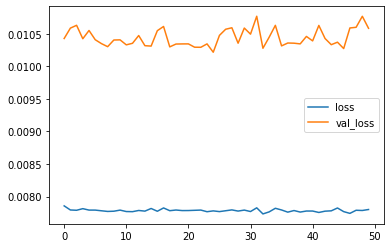

In [350]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [351]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
test_predictions

0    -0.010445
1    -0.010445
2    -0.010445
3    -0.010445
4    -0.010445
        ...   
93   -0.010445
94   -0.010445
95   -0.010445
96   -0.010445
97   -0.010445
Length: 98, dtype: float32

In [352]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,-0.040599,-0.010445
1,-0.069035,-0.010445
2,-0.161998,-0.010445
3,-0.214953,-0.010445
4,-0.181261,-0.010445
...,...,...
93,0.038272,-0.010445
94,-0.075942,-0.010445
95,-0.082482,-0.010445
96,-0.054262,-0.010445


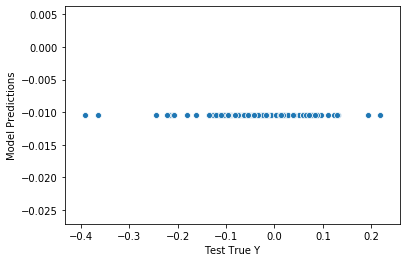

In [353]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [354]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

In [355]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.076744534

In [356]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.010582834

In [357]:
# Explained variance
explained_variance_score(y_test, test_predictions)

1.7881393432617188e-07

In [358]:
# R-squared
r2_score(y_test, test_predictions)

-0.08301851347898448

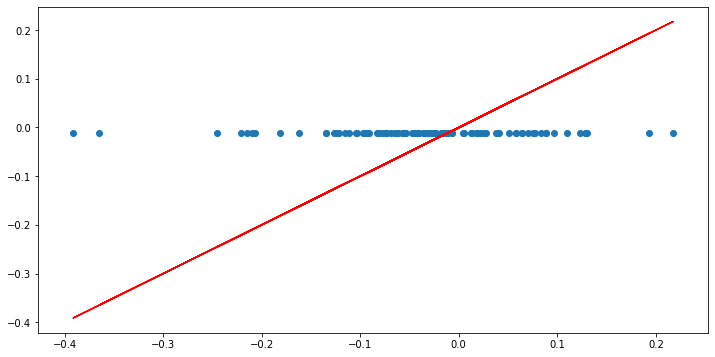

In [359]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

### Third option to prevent overfitting

In [360]:
# The third thing we can do to prevent overfitting, is to add "dropout-layers".
# So, drop-out layers will essentially turn of a percentage of neurons randomly.

In [361]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [362]:
model = Sequential()

model.add(Dense(3,activation='relu')) 
model.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [363]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Train on 226 samples, validate on 98 samples
Epoch 1/100
226/226 [==============================] - 3s 12ms/sample - loss: 0.0193 - val_loss: 0.0091
Epoch 2/100
226/226 [==============================] - 1s 6ms/sample - loss: 0.0158


KeyboardInterrupt: 

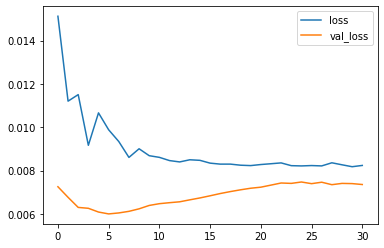

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model evaluation

In [ ]:
model.evaluate(X_test, y_test, verbose=0) # This returns back the models loss

# So, what this number actually represents is the metric loss that you decided on.
# And in in our case, that is Mean Squared Error (MSE)

# So, what this means is, on the test set, that is data it has never seen before,
# it is getting back a Mean Squared Error (MSE) of 0.006197

0.0073600239975720036

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(98,))

In [ ]:
test_predictions

0    -0.021658
1    -0.021658
2    -0.021658
3    -0.021658
4    -0.021658
        ...   
93   -0.021658
94   -0.021658
95   -0.021658
96   -0.175825
97   -0.021658
Length: 98, dtype: float32

In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
# So here, I can directly see, based on my Test set, what the true return value was,
# and what my model predicted.

pred_df

,Test True Y,Model Predictions
0,0.019927,-0.021658
1,0.007085,-0.021658
2,-0.040599,-0.021658
3,0.045801,-0.021658
4,-0.036568,-0.021658
...,...,...
93,0.015813,-0.021658
94,0.043854,-0.021658
95,-0.081753,-0.021658
96,-0.364555,-0.175825


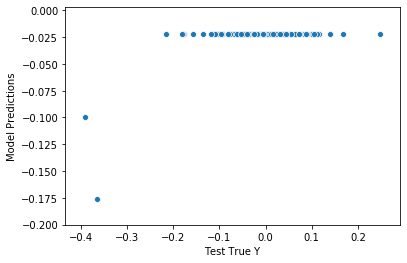

In [ ]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

In [ ]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.06492245

In [ ]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.007360024

In [ ]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

0.08579058172108625

In [ ]:
explained_variance_score(y_test, test_predictions)

0.3306814432144165

In [ ]:
r2_score(y_test, test_predictions)

0.15611215386726185

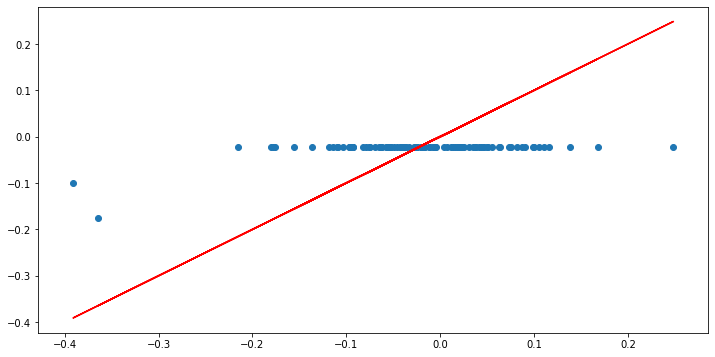

In [ ]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

### Predicting on brand new data

In [ ]:
# new_returns_nor = [[-0.01, 0.04]]
new_returns_nor = [np.random.randint(-7, 7, 113)/100]
print(new_returns_nor)


[array([-0.01, -0.06,  0.04,  0.  ,  0.  ,  0.05, -0.07,  0.02, -0.05,
        0.  ,  0.03,  0.02, -0.01,  0.05,  0.02, -0.02,  0.02,  0.03,
        0.05, -0.01, -0.07,  0.04, -0.04,  0.04,  0.04, -0.02,  0.  ,
        0.06,  0.02,  0.  ,  0.  ,  0.06, -0.01,  0.04, -0.01,  0.01,
       -0.02,  0.05,  0.06,  0.02,  0.03,  0.04, -0.02, -0.06,  0.04,
       -0.01,  0.06, -0.07,  0.05, -0.04, -0.01, -0.07,  0.03, -0.02,
       -0.05, -0.05,  0.02,  0.03, -0.07, -0.04, -0.01, -0.03, -0.04,
        0.03, -0.02,  0.04, -0.03, -0.07, -0.05,  0.04,  0.03, -0.02,
       -0.02,  0.06, -0.04, -0.06, -0.05, -0.01, -0.06, -0.01, -0.06,
        0.06, -0.07, -0.03, -0.05,  0.02,  0.03, -0.01, -0.05,  0.03,
        0.05, -0.06,  0.04,  0.  ,  0.01, -0.05,  0.06,  0.03, -0.07,
       -0.07, -0.06,  0.05, -0.06,  0.06,  0.02,  0.02, -0.07, -0.03,
        0.01,  0.02,  0.05,  0.  , -0.04])]


In [ ]:
new_returns_nor = scaler.transform(new_returns_nor)
# So, now I have the scaled version of these features.
print(new_returns_nor)

[[0.50476816 0.37198107 0.75818039 0.57257605 0.50848317 0.6138647
  0.32660835 0.53686607 0.32040258 0.63638276 0.60696769 0.59623446
  0.52129621 0.78215212 0.5831006  0.40000431 0.70707184 0.68496529
  0.80424788 0.43236113 0.27033403 0.61367898 0.2369925  0.48778266
  0.53323368 0.41217354 0.56043005 0.83092514 0.61730798 0.45856062
  0.61136073 0.68339675 0.57089005 0.69030015 0.47772854 0.49424251
  0.48102645 0.69331511 0.56734671 0.54306553 0.59489539 0.61121579
  0.31601969 0.19466053 0.67939638 0.39438671 0.79591745 0.35351141
  0.6344886  0.3558973  0.39325245 0.28520084 0.43012943 0.31322615
  0.23084649 0.41760468 0.70259767 0.64371853 0.29310234 0.42751158
  0.49451209 0.34699014 0.33549557 0.63858711 0.34125847 0.5367073
  0.43063944 0.17485431 0.23998355 0.74676706 0.55949133 0.38031727
  0.38033118 0.6071909  0.24991276 0.37677897 0.29089885 0.48775503
  0.18385157 0.40670388 0.22891886 0.82417158 0.10953043 0.3824333
  0.28197799 0.49015357 0.53957436 0.48190913 0.369

In [ ]:
# Take the model and predict the return of that "new returns (ret_vw)"
model.predict(new_returns_nor)

# So, that is how you predict on a brand new set of data.
# Keep in mind, that is the exact same process as you run on your test dataset.
# Since your test dataset, according to the model, is essentially brand new data it has never seen before.
# So, the way you evaluate your test set is basically the exact same thing you would do for brand new data.

array([[0.00025261]], dtype=float32)

In [ ]:
# How to use "model.predict(new_returns_nor)" to get "R_p"?

# Nick's answer:
# R_p = w*R_mkt_nor , w will be dependent on the predicted new_returns_nor

# What is the value "array([[????????]], dtype=float32)" here? Is it the predicted market returns, R_mkt_nor? It is only 1 value. R_mkt_nor is 324 rows.
# For me to understand, it should be like 324 rows so that we can get a column with 324 weights. But maybe I am wrong.

In [ ]:
# help(model.predict)

### Finally, if you are running a very complex model that took a lot of time to train...
### You want to make sure that you save that model.
### And Keras make that quite easy (see below).

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# And then I take my current existing model, and I save it as an h5-file.

model.save('my_norway_return_model.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_norway_return_model.h5py\assets


In [ ]:
# And now I can use the "load_model" command.
# So, later on, I can say, ok I am in a new Notebook, and I want to load up this model.
# Then I simply run this import command "load_model", and I say: Later model is equal to...
# And then I read in that model I saved.

later_model = load_model('my_norway_return_model.h5py')

# And then you may get some warning there based on the input shape. 
# You can totally ignore that warning. It is ok.

In [ ]:
# But notice, now I can treat that later model just as I would with any other model.
# And then predict on "new_returns_norway", just as I did before.

later_model.predict(new_returns_nor)

# And notice we get back the exact same results.

# So, that is how you can both save a model, and then load it later in a new file.

array([[0.00025261]], dtype=float32)